## Text Data - Sentiment Analysis


###### This dataset consists of reviews of fine foods from amazon. The data span a period of more than 10 years, 
###### including all ~500,000 reviews up to October 2012. 
###### Reviews include product and user information, ratings, 
###### and a plain text review. It also includes reviews from all other Amazon categories.


#### Steps for Data Analysis and Model_building.
1) reading the data(unzipping the txt files)

2) creating a data frame.

3) Exploratory Data Aanalysis.

4) Data cleaning and Data preprocessing.

5) Splitting the data into train and test.

6) Model building.

7) evaluation(accuracy_score).

### unzipping the files in google colab

In [42]:
%config InlineBackend.figure_format='retina'
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
!unzip '/content/drive/MyDrive/txt_reviews.zip' -d '/content/reviews'

Streaming output truncated to the last 5000 lines.
  inflating: /content/reviews/txt_reviews/review_95499.txt  
  inflating: /content/reviews/txt_reviews/review_955.txt  
  inflating: /content/reviews/txt_reviews/review_9550.txt  
  inflating: /content/reviews/txt_reviews/review_95500.txt  
  inflating: /content/reviews/txt_reviews/review_95501.txt  
  inflating: /content/reviews/txt_reviews/review_95502.txt  
  inflating: /content/reviews/txt_reviews/review_95503.txt  
  inflating: /content/reviews/txt_reviews/review_95504.txt  
  inflating: /content/reviews/txt_reviews/review_95505.txt  
  inflating: /content/reviews/txt_reviews/review_95506.txt  
  inflating: /content/reviews/txt_reviews/review_95507.txt  
  inflating: /content/reviews/txt_reviews/review_95508.txt  
  inflating: /content/reviews/txt_reviews/review_95509.txt  
  inflating: /content/reviews/txt_reviews/review_9551.txt  
  inflating: /content/reviews/txt_reviews/review_95510.txt  
  inflating: /content/reviews/txt_revi

In [45]:
import os
os.listdir()

['.config', 'cleaned_data.csv', 'drive', 'reviews', 'sample_data']

In [46]:
file_names = os.listdir(r'/content/reviews/txt_reviews')


In [47]:
root= r'/content/reviews/txt_reviews'

In [3]:
import pandas as pd
import numpy as np


In [49]:
ProductId  = []
UserId  =[]
ProfileName=[]
HelpfulnessNumerator =[]
HelpfulnessDenominator =[]
Score =[]
Time =[]
ReviewSummary =[]
ReviewText =[]

for file in file_names:
    with open(os.path.join(root,file), 'rt') as f:
        lines = f.readlines()
        ProductId.append(lines[0].split(':')[1].strip('\n'))
        UserId.append(lines[1].split(':')[1].strip('\n'))
        ProfileName.append(lines[2].split(':')[1].strip('\n'))
        HelpfulnessNumerator.append(lines[3].split(':')[1].strip('\n'))
        HelpfulnessDenominator.append(lines[4].split(':')[1].strip('\n'))
        Score.append(lines[5].split(':')[1].strip('\n'))
        Time.append(lines[6].split(':')[1].strip('\n'))
        ReviewSummary.append(lines[7].split(':')[1].strip('\n'))
        ReviewText.append(lines[8].split(':')[1].strip('\n'))
        
df = pd.DataFrame({ 'ProductId': ProductId, 'UserId':UserId,'ProfileName':ProfileName,'HelpfulnessNumerator':HelpfulnessNumerator,
                   'HelpfulnessDenominator': HelpfulnessDenominator,'Score':Score, 'Time':Time, 'ReviewSummary':ReviewSummary,
                  'ReviewText':ReviewText })


In [50]:
df.to_csv('review_data.csv')

In [ ]:
df.columns

Index(['ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'ReviewSummary',
       'ReviewText'],
      dtype='object')

In [51]:
df.Score.unique()

array([' 5', ' 4', ' 1', ' 3', ' 2'], dtype=object)

In [ ]:
df.shape

(568454, 9)

In [ ]:
df.head()

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,ReviewSummary,ReviewText
0,B000UU8KA2,A3PTDVALS7JJGA,vicop69,0,0,5,1318896000,Rain-Blo Gum,This is the best gum ever. They make smaller ...
1,B0002DGRRA,A38AN6ZRMHV6EU,Carole S. Stabile,0,0,5,1243382400,Happy Dog,This is a healthy and good snack for my dog. ...
2,B008JHZ150,A1F7YU6O5RU432,Angela Streiff,1,1,5,1347580800,A delicious hot sauce with some flavor,I love that this Tabanero hot sauce actually ...
3,B000EH4XZM,AQ1G6JEBH5QWY,Ms. Diane C. Frandsen,0,0,4,1224806400,rice review,love this product. very good quality. The fla...
4,B00024D9X4,A1P85GZIZSL9IE,"Julia Osborn ""texasmom""",1,1,1,1301097600,Yuk!,This is by far the nastiest thing I have ever...


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   ProductId               568454 non-null  object
 1   UserId                  568454 non-null  object
 2   ProfileName             568454 non-null  object
 3   HelpfulnessNumerator    568454 non-null  object
 4   HelpfulnessDenominator  568454 non-null  object
 5   Score                   568454 non-null  object
 6   Time                    568454 non-null  object
 7   ReviewSummary           568454 non-null  object
 8   ReviewText              568454 non-null  object
dtypes: object(9)
memory usage: 39.0+ MB


## Data cleaning

#### (handling currupted data)

In [70]:
df.HelpfulnessNumerator=df.HelpfulnessNumerator.astype(int)
df.HelpfulnessDenominator=df.HelpfulnessDenominator.astype(int)
df.Score=df.Score.astype(int)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   ProductId               568454 non-null  object
 1   UserId                  568454 non-null  object
 2   ProfileName             568454 non-null  object
 3   HelpfulnessNumerator    568454 non-null  int64 
 4   HelpfulnessDenominator  568454 non-null  int64 
 5   Score                   568454 non-null  object
 6   Time                    568454 non-null  object
 7   ReviewSummary           568454 non-null  object
 8   ReviewText              568454 non-null  object
dtypes: int64(2), object(7)
memory usage: 39.0+ MB


## Checking for the duplicates

In [58]:
df[df.duplicated()]

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,ReviewSummary,ReviewText
20178,B004FGWU9O,A10H24TDLK2VDP,William Jens Jensen,0,0,3,1309824000,Unremarkable,"First, let me say that I prefer extra-bold K-..."
23664,B00074W3C2,A29JUMRL1US6YP,HTBK,0,0,5,1278720000,Great Low Calorie Training Treats,"Charlee Bears are small and low calorie, so y..."
38075,B002C1URM6,A2QJF1B00I7BT7,iluvadeal,0,0,5,1298678400,Cats love it,After one of my cats experienced some tummy p...
54744,B001BDDT8K,AF3BYMPWKWO8F,Joe MacBu,3,3,1,1243555200,Warning,"According to the manufacturer's website, this..."
64767,B000MXJR68,A3O0VDZUOJPZWX,Orlando Mom,0,0,5,1313020800,Best price anywhere!,My little one loves these and you cannot beat...
...,...,...,...,...,...,...,...,...,...
563066,B000HJ7AIY,A3OXHLG6DIBRW8,"C. F. Hill ""CFH""",2,2,5,1251244800,Caught A Lot Of Moths! Highly Recommended!,These Safer Brand Pantry Pest Traps far excee...
564029,B001BCVY9W,A3FKGKUCI3DG9U,Paul Moskowitz,0,0,3,1229472000,"If it looks good, is it good for the cats?",My two traditional striped cats eat mostly dr...
565886,B007I7Z3Z0,AC6LV5D2RKTIR,"Michigoon ""tech geek""",0,0,3,1334793600,It's alright,"For a water-flavoring powder, it doesn't mix ..."
568097,B00014JYNO,AM820RV0VN0U,windie809,0,0,5,1339459200,love these protein bars!,if you are looking for a protein bar that doe...


In [59]:
df.drop_duplicates(keep='first', inplace=True)

In [60]:
df.isna().sum()

ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
ReviewSummary             0
ReviewText                0
dtype: int64

In [62]:
df.Score.unique()

array([' 5', ' 4', ' 1', ' 3', ' 2'], dtype=object)

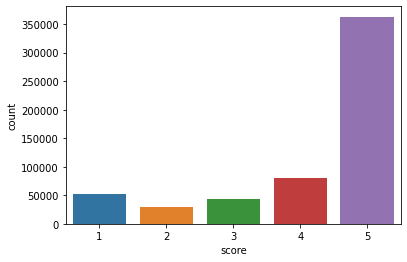

In [7]:
import seaborn as sns
sns.countplot(x = df.Score);


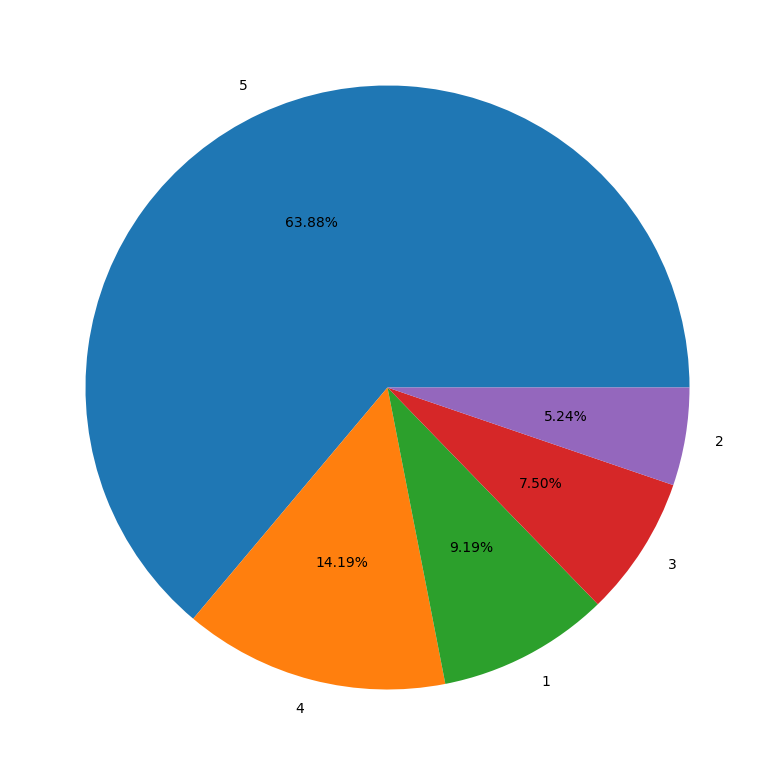

In [10]:
import matplotlib.pyplot as plt
plt.figure(dpi=100, figsize=(15,10))

plt.pie(x = df.Score.value_counts(), labels=df.Score.value_counts().index, autopct="%.2f%%");


#### as the rating is ordinal and in this data, considering 1 and 2 as negative/poor rating 

#### 4 and 5 are good rating score ie. positive
#### considering 3 score as neutral(neither positive nor negative 

In [71]:
# taking binary class clasiification : score<3 as 0 ie. -ve and score>3 as 1 ie: +ve
df.loc[df['Score']<3, 'Score']=0
df.loc[df['Score']>3, 'Score']=1

In [73]:
# removing the rows with score value equal to 3 as it considering as neutral
df=df[df['Score']!=3]

## Applying Data cleaning and data preprocessing for text data

In [63]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [64]:
## creating objects for the classes
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()


In [65]:
def preprocess(raw_text, flag):
    # Removing special characters and digits
    sentence = re.sub("[^a-zA-Z]", " ", raw_text)
    
    # change sentence to lower case
    sentence = sentence.lower()

    # tokenize into words
    tokens = sentence.split()
    
    # remove stop words                
    clean_tokens = [t for t in tokens if not t in stopwords.words("english")]
    
    # Stemming/Lemmatization
    if(flag == 'stem'):
        clean_tokens = [stemmer.stem(word) for word in clean_tokens]
    else:
        clean_tokens = [lemmatizer.lemmatize(word) for word in clean_tokens]
    
    return pd.Series([" ".join(clean_tokens), len(clean_tokens)])


In [ ]:
df.ReviewSummary.unique()

array([' Rain-Blo Gum', ' Happy Dog',
       ' A delicious hot sauce with some flavor', ...,
       ' Good garlic kick!', ' irish seeds', " don't buy these!"],
      dtype=object)

In [66]:
from tqdm import tqdm, tqdm_notebook
tqdm.pandas()


In [67]:
temp_df = df['ReviewText'].progress_apply(lambda x: preprocess(x, 'lemm'))

temp_df.head()


100%|██████████| 568167/568167 [1:49:21<00:00, 86.58it/s] 


,0,1
0,best gum ever make smaller size go little stuf...,11
1,healthy good snack dog great training produst ...,13
2,love tabanero hot sauce actually flavor adding...,68
3,love product good quality flavor excellent lik...,12
4,far nastiest thing ever put mouth husband eat ...,25


In [68]:
temp_df.to_csv('lemm.csv')

In [74]:
df.Score.unique()

array([1, 0])

In [79]:
df.isna().sum()

ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
ReviewSummary             0
ReviewText                0
dtype: int64

In [87]:
print(df.shape, temp_df.shape)

(525553, 9) (568167, 3)


In [80]:
temp_df['Score']=df['Score'].copy()

In [81]:
temp_df.head()

,0,1,Score
0,best gum ever make smaller size go little stuf...,11,1.0
1,healthy good snack dog great training produst ...,13,1.0
2,love tabanero hot sauce actually flavor adding...,68,1.0
3,love product good quality flavor excellent lik...,12,1.0
4,far nastiest thing ever put mouth husband eat ...,25,0.0


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


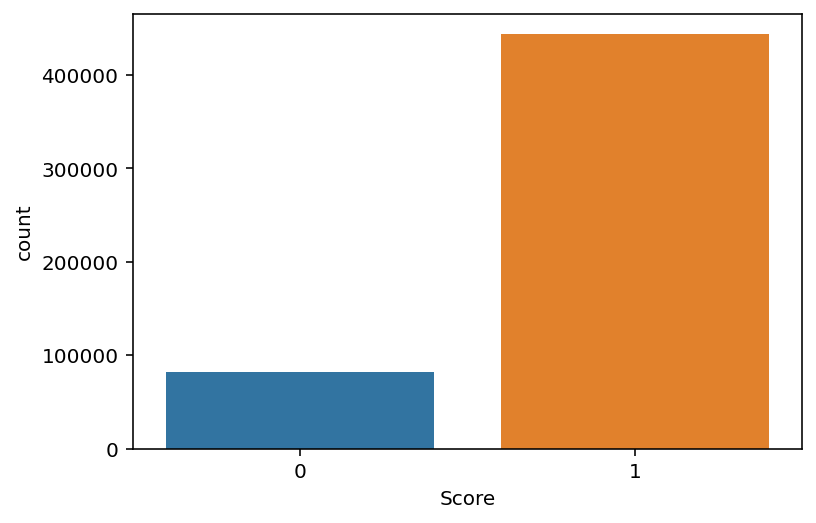

In [158]:
sns.countplot(temp_df.Score);

In [89]:
temp_df.dropna(inplace=True)

In [90]:
temp_df.shape

(525553, 3)

In [92]:
## changing the type of score
temp_df.Score=temp_df.Score.astype(object)

In [93]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 525553 entries, 0 to 568453
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   0       525553 non-null  object
 1   1       525553 non-null  int64 
 2   Score   525553 non-null  object
dtypes: int64(1), object(2)
memory usage: 16.0+ MB


## Changing the column names


In [99]:
temp_df.set_axis(['clean_reviewtext', 'lemm_scr', 'Score'], axis='columns', inplace=True)

In [100]:
temp_df.columns

Index(['clean_reviewtext', 'lemm_scr', 'Score'], dtype='object')

In [121]:
temp_df.Score=temp_df.Score.astype(int)

In [110]:
temp_df.Score.unique()

array([1, 0])

In [160]:
temp_df.Score.value_counts(normalize=True)

1    0.843981
0    0.156019
Name: Score, dtype: float64

~~~
as in the above value counts we can see that positive/good rating/score are more compare to negative rating,
so with such data, model can learn more patterns about positive rating and predicts good results compare to negative ratings.
~~~

### now separating input and output data

In [122]:
y=temp_df['Score']
X=temp_df[['clean_reviewtext']]

In [123]:
### Train_test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state= 1 )

### applying Bag of Words


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vocab = CountVectorizer()

X_train_trans = vocab.fit_transform(X_train['clean_reviewtext'])

### Applying CountVectorizer/BOW transformation on test data


In [125]:
X_test_trans = vocab.transform(X_test['clean_reviewtext'])

### model building
### logistic regression

In [126]:
#### model building
###logistic regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train_trans, y_train)


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [127]:
y_test_pred = classifier.predict(X_test_trans)


In [128]:
from sklearn import metrics
log_val = metrics.accuracy_score(y_test,y_test_pred)
print(log_val )


0.9334513038597292


## Decision Tree Classifier


In [130]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train_trans, y_train)


DecisionTreeClassifier()

In [131]:
y_test_pred = classifier.predict(X_test_trans)


In [132]:
dt_val = metrics.accuracy_score(y_test,y_test_pred)
print(dt_val )


0.9103804549476268


### KNN Classifier

In [133]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_train_trans, y_train)


KNeighborsClassifier()

In [134]:
y_test_pred = classifier.predict(X_test_trans)


In [135]:
knn_val = metrics.accuracy_score(y_test,y_test_pred)
print(knn_val )


0.8745326369266775


In [139]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train_trans, y_train)


RandomForestClassifier()

In [140]:
y_test_pred = classifier.predict(X_test_trans)


In [141]:
accuracy_RFC = metrics.accuracy_score(y_test,y_test_pred)
print('Accuracy :',accuracy_RFC)


Accuracy : 0.9287515103081504


### Adaptive boosting

In [142]:
#AdaBoost
from sklearn.ensemble import AdaBoostClassifier
classifier = AdaBoostClassifier()
classifier.fit(X_train_trans, y_train)


AdaBoostClassifier()

In [143]:
y_test_pred = classifier.predict(X_test_trans)


In [144]:
ad_val = metrics.accuracy_score(y_test,y_test_pred)
print(ad_val)


0.8813539972029569


### Gradient Boosting Classifier

In [145]:
from sklearn.ensemble import GradientBoostingClassifier
classifier = GradientBoostingClassifier()
classifier.fit(X_train_trans, y_train)


GradientBoostingClassifier()

In [146]:
y_test_pred = classifier.predict(X_test_trans)


In [149]:
gbd_val = metrics.accuracy_score(y_test,y_test_pred)
print(gbd_val)

0.8750939483022709


### creating Dataframe

In [150]:
df_data = [['Logistic Regression', log_val],
           ['Decision Tree Classification',dt_val],
           ['KNN Classification',knn_val],
           ['Random Forest Classification',accuracy_RFC],
           ['Adaptive Boosting Classification',ad_val],
           ['Gradient Boosting Decision Tree Classifier',gbd_val ]]

data = pd.DataFrame(df_data, columns = ['Algorithm', 'Accuracy'])


In [161]:
data.to_csv('accuracy.csv')

In [151]:
data

,Algorithm,Accuracy
0,Logistic Regression,0.933451
1,Decision Tree Classification,0.910380
2,KNN Classification,0.874533
3,Random Forest Classification,0.928752
4,Adaptive Boosting Classification,0.881354
5,Gradient Boosting Decision Tree Classifier,0.875094


### Algorithm Vs Accuracy

<AxesSubplot:xlabel='Algorithm', ylabel='Accuracy'>

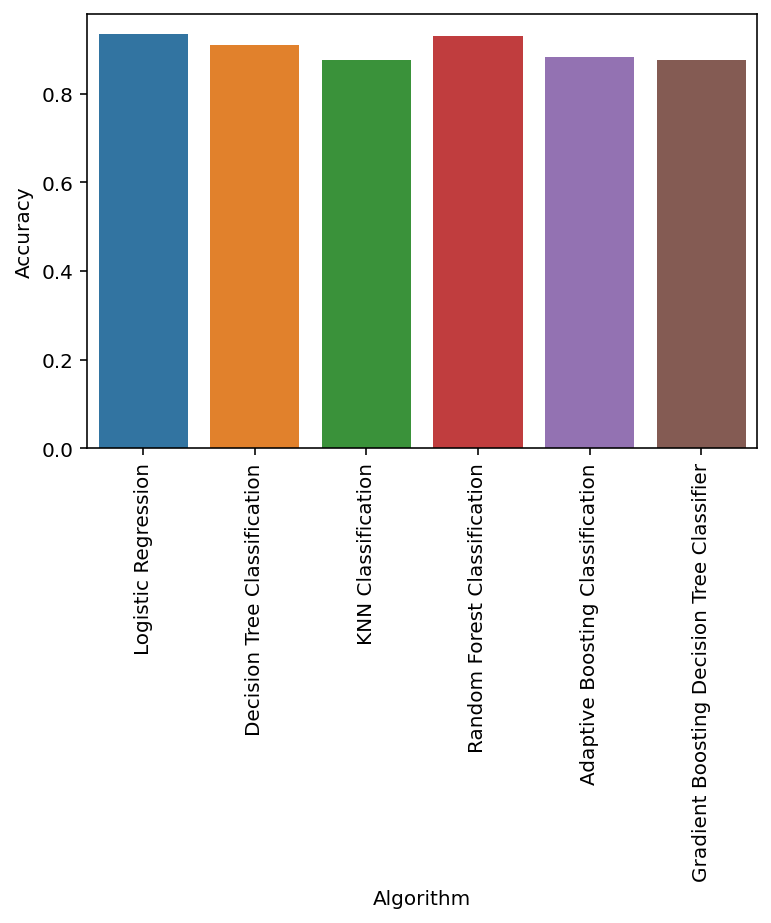

In [156]:
plt.xticks(rotation=90)
sns.barplot(x=data.Algorithm, y=data.Accuracy)


### conclusion
**from the above data we can observe that logistic regression has high accuracy.**

**Hence LogisticRegression model is used for future prediction of Sentiment Analysis.**